import libraries

In [30]:
import fastai
import torch
from fastai.vision.all import *
from tqdm import tqdm
from torch.utils.data import dataloader
import tensorflow as tf
import pandas as pd
import numpy as np

In [5]:
path = Path('/kaggle/input/pnevmoniya/train')
fls = get_image_files(path)


In [20]:
pnevmoniya = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.01, seed=10),
    get_y = parent_label,
    item_tfms = Resize(256)
)

In [21]:
# Data loaders
dls = pnevmoniya.dataloaders(path)

In [22]:
# Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5) 

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.434166,0.086565,0.980769,01:40


epoch,train_loss,valid_loss,accuracy,time
0,0.136559,0.198595,0.961538,01:44
1,0.099438,0.056703,0.980769,01:43
2,0.050690,0.005591,1.000000,01:43
3,0.026151,0.009342,1.000000,01:43
4,0.012102,0.006187,1.000000,01:44


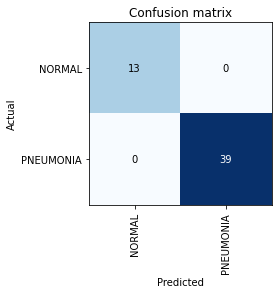

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

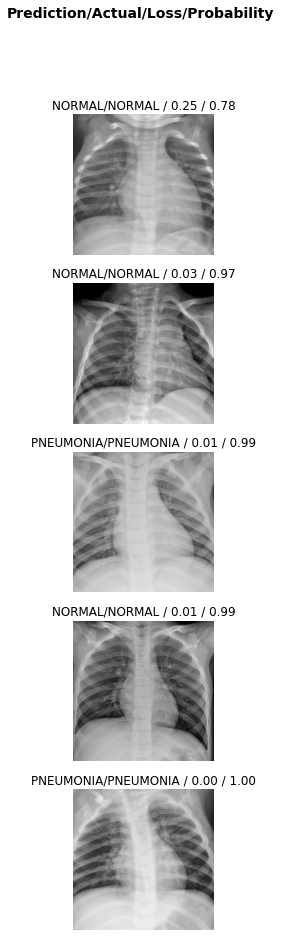

In [24]:
interp.plot_top_losses(5,nrows=5)

In [ ]:
files = !ls "../input/pnevmoniya/test"
preds = []
numbers = []
for file in tqdm(files):
    number, pred_id, probs = learn.predict(f"../input/pnevmoniya/test/{file}")
    preds.append(pred_id)
    numbers.append(number)

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 2/624 [00:00<01:00, 10.22it/s]

  1%|          | 4/624 [00:00<00:49, 12.42it/s]

  1%|          | 6/624 [00:00<00:54, 11.43it/s]

  1%|▏         | 8/624 [00:00<00:49, 12.49it/s]

  2%|▏         | 10/624 [00:00<00:48, 12.75it/s]

  2%|▏         | 12/624 [00:00<00:46, 13.19it/s]

  2%|▏         | 14/624 [00:01<00:44, 13.79it/s]

  3%|▎         | 16/624 [00:01<00:44, 13.80it/s]

  3%|▎         | 18/624 [00:01<00:42, 14.38it/s]

  3%|▎         | 20/624 [00:01<00:47, 12.74it/s]

  4%|▎         | 22/624 [00:01<00:45, 13.29it/s]

  4%|▍         | 24/624 [00:01<00:44, 13.49it/s]

  4%|▍         | 26/624 [00:01<00:43, 13.81it/s]

  4%|▍         | 28/624 [00:02<00:44, 13.39it/s]

  5%|▍         | 30/624 [00:02<00:45, 13.16it/s]

  5%|▌         | 32/624 [00:02<00:46, 12.69it/s]

  5%|▌         | 34/624 [00:02<00:47, 12.38it/s]

  6%|▌         | 36/624 [00:02<00:46, 12.58it/s]

  6%|▌         | 38/624 [00:02<00:48, 12.10it/s]

  6%|▋         | 40/624 [00:03<00:45, 12.74it/s]

  7%|▋         | 42/624 [00:03<00:48, 11.94it/s]

  7%|▋         | 44/624 [00:03<00:47, 12.28it/s]

  7%|▋         | 46/624 [00:03<00:44, 12.98it/s]

  8%|▊         | 48/624 [00:03<00:46, 12.40it/s]

  8%|▊         | 50/624 [00:03<00:45, 12.74it/s]

  8%|▊         | 52/624 [00:04<00:47, 11.94it/s]

  9%|▊         | 54/624 [00:04<00:49, 11.46it/s]

  9%|▉         | 56/624 [00:04<00:46, 12.24it/s]

  9%|▉         | 58/624 [00:04<00:45, 12.40it/s]

 10%|▉         | 60/624 [00:04<00:45, 12.40it/s]

 10%|▉         | 62/624 [00:04<00:42, 13.09it/s]

 10%|█         | 64/624 [00:05<00:41, 13.46it/s]

 11%|█         | 66/624 [00:05<00:41, 13.58it/s]

 11%|█         | 68/624 [00:05<00:40, 13.80it/s]

 11%|█         | 70/624 [00:05<00:41, 13.41it/s]

 12%|█▏        | 72/624 [00:05<00:41, 13.30it/s]

 12%|█▏        | 74/624 [00:05<00:39, 14.03it/s]

 12%|█▏        | 76/624 [00:05<00:39, 13.98it/s]

 12%|█▎        | 78/624 [00:06<00:39, 13.97it/s]

 13%|█▎        | 80/624 [00:06<00:37, 14.36it/s]

 13%|█▎        | 82/624 [00:06<00:38, 14.00it/s]

 13%|█▎        | 84/624 [00:06<00:37, 14.34it/s]

 14%|█▍        | 86/624 [00:06<00:35, 15.13it/s]

 14%|█▍        | 88/624 [00:06<00:34, 15.63it/s]

 14%|█▍        | 90/624 [00:06<00:33, 15.78it/s]

 15%|█▍        | 92/624 [00:06<00:34, 15.63it/s]

 15%|█▌        | 94/624 [00:07<00:34, 15.22it/s]

 15%|█▌        | 96/624 [00:07<00:38, 13.88it/s]

 16%|█▌        | 98/624 [00:07<00:41, 12.79it/s]

 16%|█▌        | 100/624 [00:07<00:38, 13.73it/s]

 16%|█▋        | 102/624 [00:07<00:37, 13.81it/s]

 17%|█▋        | 104/624 [00:07<00:36, 14.41it/s]

 17%|█▋        | 106/624 [00:07<00:40, 12.94it/s]

 17%|█▋        | 108/624 [00:08<00:42, 12.11it/s]

 18%|█▊        | 110/624 [00:08<00:40, 12.55it/s]

 18%|█▊        | 112/624 [00:08<00:40, 12.52it/s]

 18%|█▊        | 114/624 [00:08<00:40, 12.58it/s]

 19%|█▊        | 116/624 [00:08<00:37, 13.48it/s]

 19%|█▉        | 118/624 [00:08<00:37, 13.35it/s]

 19%|█▉        | 120/624 [00:09<00:37, 13.31it/s]

 20%|█▉        | 122/624 [00:09<00:35, 14.08it/s]

 20%|█▉        | 124/624 [00:09<00:33, 15.03it/s]

 20%|██        | 126/624 [00:09<00:34, 14.46it/s]

 21%|██        | 128/624 [00:09<00:33, 15.02it/s]

 21%|██        | 130/624 [00:09<00:34, 14.43it/s]

 21%|██        | 132/624 [00:09<00:33, 14.78it/s]

 21%|██▏       | 134/624 [00:10<00:33, 14.72it/s]

 22%|██▏       | 136/624 [00:10<00:36, 13.37it/s]

 22%|██▏       | 138/624 [00:10<00:37, 13.03it/s]

 22%|██▏       | 140/624 [00:10<00:35, 13.80it/s]

 23%|██▎       | 142/624 [00:10<00:35, 13.75it/s]

 23%|██▎       | 144/624 [00:10<00:33, 14.45it/s]

 23%|██▎       | 146/624 [00:10<00:32, 14.90it/s]

 24%|██▎       | 148/624 [00:10<00:31, 14.95it/s]

 24%|██▍       | 150/624 [00:11<00:32, 14.63it/s]

 24%|██▍       | 152/624 [00:11<00:31, 14.79it/s]

 25%|██▍       | 154/624 [00:11<00:30, 15.33it/s]

 25%|██▌       | 156/624 [00:11<00:30, 15.16it/s]

 25%|██▌       | 158/624 [00:11<00:31, 14.85it/s]

 26%|██▌       | 160/624 [00:11<00:33, 14.04it/s]

 26%|██▌       | 162/624 [00:11<00:33, 13.63it/s]

 26%|██▋       | 164/624 [00:12<00:32, 13.94it/s]

 27%|██▋       | 166/624 [00:12<00:34, 13.45it/s]

 27%|██▋       | 168/624 [00:12<00:32, 13.86it/s]

 27%|██▋       | 170/624 [00:12<00:31, 14.25it/s]

 28%|██▊       | 172/624 [00:12<00:30, 14.89it/s]

 28%|██▊       | 174/624 [00:12<00:30, 14.77it/s]

 28%|██▊       | 176/624 [00:12<00:31, 14.13it/s]

 29%|██▊       | 178/624 [00:13<00:32, 13.66it/s]

 29%|██▉       | 180/624 [00:13<00:31, 13.90it/s]

 29%|██▉       | 182/624 [00:13<00:35, 12.55it/s]

 29%|██▉       | 184/624 [00:13<00:38, 11.47it/s]

 30%|██▉       | 186/624 [00:13<00:37, 11.76it/s]

 30%|███       | 188/624 [00:14<00:37, 11.56it/s]

 30%|███       | 190/624 [00:14<00:34, 12.69it/s]

 31%|███       | 192/624 [00:14<00:32, 13.32it/s]

 31%|███       | 194/624 [00:14<00:35, 12.01it/s]

 31%|███▏      | 196/624 [00:14<00:35, 12.18it/s]

 32%|███▏      | 198/624 [00:14<00:32, 13.08it/s]

 32%|███▏      | 200/624 [00:14<00:31, 13.44it/s]

 32%|███▏      | 202/624 [00:15<00:31, 13.59it/s]

 33%|███▎      | 204/624 [00:15<00:30, 13.89it/s]

 33%|███▎      | 206/624 [00:15<00:29, 14.00it/s]

 33%|███▎      | 208/624 [00:15<00:28, 14.47it/s]

 34%|███▎      | 210/624 [00:15<00:31, 13.23it/s]

 34%|███▍      | 212/624 [00:15<00:31, 13.21it/s]

 34%|███▍      | 214/624 [00:15<00:35, 11.41it/s]

 35%|███▍      | 216/624 [00:16<00:39, 10.28it/s]

 35%|███▍      | 218/624 [00:16<00:39, 10.19it/s]

 35%|███▌      | 220/624 [00:16<00:38, 10.36it/s]

 36%|███▌      | 222/624 [00:16<00:44,  9.08it/s]

 36%|███▌      | 224/624 [00:17<00:38, 10.30it/s]

 36%|███▌      | 226/624 [00:17<00:34, 11.61it/s]

 37%|███▋      | 228/624 [00:17<00:33, 11.66it/s]

 37%|███▋      | 230/624 [00:17<00:30, 12.78it/s]

 37%|███▋      | 232/624 [00:17<00:31, 12.32it/s]

 38%|███▊      | 234/624 [00:17<00:30, 12.97it/s]

 38%|███▊      | 236/624 [00:17<00:30, 12.76it/s]

 38%|███▊      | 238/624 [00:18<00:29, 12.91it/s]

 38%|███▊      | 240/624 [00:18<00:29, 13.13it/s]

 39%|███▉      | 242/624 [00:18<00:29, 13.08it/s]

 39%|███▉      | 244/624 [00:18<00:28, 13.18it/s]

 39%|███▉      | 246/624 [00:18<00:27, 13.91it/s]

 40%|███▉      | 248/624 [00:18<00:26, 13.93it/s]

 40%|████      | 250/624 [00:18<00:30, 12.40it/s]

 40%|████      | 252/624 [00:19<00:28, 13.21it/s]

 41%|████      | 254/624 [00:19<00:26, 14.05it/s]

 41%|████      | 256/624 [00:19<00:25, 14.39it/s]

 41%|████▏     | 258/624 [00:19<00:27, 13.30it/s]

 42%|████▏     | 260/624 [00:19<00:25, 14.24it/s]

 42%|████▏     | 262/624 [00:19<00:24, 14.57it/s]

 42%|████▏     | 264/624 [00:19<00:24, 14.72it/s]

 43%|████▎     | 266/624 [00:20<00:27, 13.08it/s]

 43%|████▎     | 268/624 [00:20<00:27, 13.03it/s]

 43%|████▎     | 270/624 [00:20<00:25, 13.62it/s]

 44%|████▎     | 272/624 [00:20<00:24, 14.45it/s]

 44%|████▍     | 274/624 [00:20<00:23, 15.10it/s]

 44%|████▍     | 276/624 [00:20<00:22, 15.29it/s]

 45%|████▍     | 278/624 [00:20<00:26, 12.90it/s]

 45%|████▍     | 280/624 [00:21<00:25, 13.56it/s]

 45%|████▌     | 282/624 [00:21<00:27, 12.46it/s]

 46%|████▌     | 284/624 [00:21<00:25, 13.53it/s]

 46%|████▌     | 286/624 [00:21<00:27, 12.40it/s]

 46%|████▌     | 288/624 [00:21<00:25, 13.41it/s]

 46%|████▋     | 290/624 [00:21<00:27, 12.13it/s]

 47%|████▋     | 292/624 [00:22<00:25, 12.82it/s]

 47%|████▋     | 294/624 [00:22<00:26, 12.24it/s]

 47%|████▋     | 296/624 [00:22<00:25, 12.70it/s]

 48%|████▊     | 298/624 [00:22<00:24, 13.37it/s]

 48%|████▊     | 300/624 [00:22<00:23, 14.06it/s]

 48%|████▊     | 302/624 [00:22<00:24, 13.28it/s]

 49%|████▊     | 304/624 [00:22<00:23, 13.91it/s]

 49%|████▉     | 306/624 [00:23<00:23, 13.35it/s]

 49%|████▉     | 308/624 [00:23<00:23, 13.48it/s]

 50%|████▉     | 310/624 [00:23<00:24, 12.92it/s]

 50%|█████     | 312/624 [00:23<00:22, 13.57it/s]

 50%|█████     | 314/624 [00:23<00:21, 14.67it/s]

 51%|█████     | 316/624 [00:23<00:20, 14.79it/s]

 51%|█████     | 318/624 [00:23<00:19, 15.47it/s]

 51%|█████▏    | 320/624 [00:24<00:20, 14.95it/s]

 52%|█████▏    | 322/624 [00:24<00:19, 15.33it/s]

 52%|█████▏    | 324/624 [00:24<00:20, 14.59it/s]

 52%|█████▏    | 326/624 [00:24<00:23, 12.45it/s]

 53%|█████▎    | 328/624 [00:24<00:24, 12.08it/s]

 53%|█████▎    | 330/624 [00:24<00:24, 12.00it/s]

 53%|█████▎    | 332/624 [00:25<00:23, 12.64it/s]

 54%|█████▎    | 334/624 [00:25<00:24, 11.66it/s]

 54%|█████▍    | 336/624 [00:25<00:24, 11.56it/s]

 54%|█████▍    | 338/624 [00:25<00:23, 12.25it/s]

 54%|█████▍    | 340/624 [00:25<00:24, 11.49it/s]

 55%|█████▍    | 342/624 [00:25<00:23, 12.21it/s]

 55%|█████▌    | 344/624 [00:26<00:23, 11.68it/s]

 55%|█████▌    | 346/624 [00:26<00:22, 12.47it/s]

 56%|█████▌    | 348/624 [00:26<00:21, 13.13it/s]

 56%|█████▌    | 350/624 [00:26<00:19, 14.09it/s]

 56%|█████▋    | 352/624 [00:26<00:20, 13.24it/s]

 57%|█████▋    | 354/624 [00:26<00:19, 13.83it/s]

 57%|█████▋    | 356/624 [00:26<00:18, 14.44it/s]

 57%|█████▋    | 358/624 [00:27<00:18, 14.04it/s]

 58%|█████▊    | 360/624 [00:27<00:20, 12.68it/s]

 58%|█████▊    | 362/624 [00:27<00:19, 13.41it/s]

 58%|█████▊    | 364/624 [00:27<00:18, 13.85it/s]

 59%|█████▊    | 366/624 [00:27<00:18, 14.27it/s]

 59%|█████▉    | 368/624 [00:27<00:17, 14.74it/s]

 59%|█████▉    | 370/624 [00:27<00:19, 12.78it/s]

 60%|█████▉    | 372/624 [00:28<00:19, 12.96it/s]

 60%|█████▉    | 374/624 [00:28<00:18, 13.54it/s]

 60%|██████    | 376/624 [00:28<00:17, 14.01it/s]

 61%|██████    | 378/624 [00:28<00:16, 14.65it/s]

 61%|██████    | 380/624 [00:28<00:19, 12.63it/s]

 61%|██████    | 382/624 [00:28<00:18, 13.05it/s]

 62%|██████▏   | 384/624 [00:28<00:17, 13.80it/s]

 62%|██████▏   | 386/624 [00:29<00:17, 13.37it/s]

 62%|██████▏   | 388/624 [00:29<00:17, 13.71it/s]

 62%|██████▎   | 390/624 [00:29<00:16, 14.60it/s]

 63%|██████▎   | 392/624 [00:29<00:16, 13.84it/s]

 63%|██████▎   | 394/624 [00:29<00:16, 14.06it/s]

 63%|██████▎   | 396/624 [00:29<00:15, 14.57it/s]

 64%|██████▍   | 398/624 [00:29<00:15, 14.56it/s]

 64%|██████▍   | 400/624 [00:30<00:17, 13.08it/s]

 64%|██████▍   | 402/624 [00:30<00:16, 13.47it/s]

 65%|██████▍   | 404/624 [00:30<00:16, 13.52it/s]

 65%|██████▌   | 406/624 [00:30<00:17, 12.71it/s]

 65%|██████▌   | 408/624 [00:30<00:16, 13.34it/s]

 66%|██████▌   | 410/624 [00:30<00:15, 13.80it/s]

 66%|██████▌   | 412/624 [00:30<00:14, 14.83it/s]

 66%|██████▋   | 414/624 [00:31<00:13, 15.54it/s]

 67%|██████▋   | 416/624 [00:31<00:12, 16.19it/s]

 67%|██████▋   | 418/624 [00:31<00:13, 15.66it/s]

 67%|██████▋   | 420/624 [00:31<00:12, 16.21it/s]

 68%|██████▊   | 422/624 [00:31<00:12, 16.47it/s]

 68%|██████▊   | 424/624 [00:31<00:12, 16.53it/s]

 68%|██████▊   | 426/624 [00:31<00:11, 16.71it/s]

 69%|██████▊   | 428/624 [00:31<00:12, 16.29it/s]

 69%|██████▉   | 430/624 [00:32<00:11, 16.25it/s]

 69%|██████▉   | 432/624 [00:32<00:12, 15.26it/s]

 70%|██████▉   | 434/624 [00:32<00:11, 15.89it/s]

 70%|██████▉   | 436/624 [00:32<00:11, 16.24it/s]

 70%|███████   | 438/624 [00:32<00:11, 15.90it/s]

 71%|███████   | 440/624 [00:32<00:11, 16.34it/s]

 71%|███████   | 442/624 [00:32<00:11, 16.40it/s]

 71%|███████   | 444/624 [00:32<00:12, 14.89it/s]

 71%|███████▏  | 446/624 [00:33<00:11, 15.55it/s]

 72%|███████▏  | 448/624 [00:33<00:10, 16.20it/s]

 72%|███████▏  | 450/624 [00:33<00:10, 16.37it/s]

 72%|███████▏  | 452/624 [00:33<00:10, 16.63it/s]

 73%|███████▎  | 454/624 [00:33<00:10, 16.64it/s]

 73%|███████▎  | 456/624 [00:33<00:10, 16.21it/s]

 73%|███████▎  | 458/624 [00:33<00:10, 16.12it/s]

 74%|███████▎  | 460/624 [00:33<00:09, 16.56it/s]

 74%|███████▍  | 462/624 [00:34<00:09, 16.76it/s]

 74%|███████▍  | 464/624 [00:34<00:09, 16.68it/s]

 75%|███████▍  | 466/624 [00:34<00:09, 16.63it/s]

 75%|███████▌  | 468/624 [00:34<00:09, 15.80it/s]

 75%|███████▌  | 470/624 [00:34<00:09, 16.12it/s]

 76%|███████▌  | 472/624 [00:34<00:09, 16.33it/s]

 76%|███████▌  | 474/624 [00:34<00:09, 15.92it/s]

 76%|███████▋  | 476/624 [00:34<00:09, 16.36it/s]

 77%|███████▋  | 478/624 [00:35<00:08, 16.64it/s]

 77%|███████▋  | 480/624 [00:35<00:08, 16.64it/s]

 77%|███████▋  | 482/624 [00:35<00:08, 16.79it/s]

 78%|███████▊  | 484/624 [00:35<00:09, 15.06it/s]

 78%|███████▊  | 486/624 [00:35<00:09, 14.74it/s]

 78%|███████▊  | 488/624 [00:35<00:09, 14.59it/s]

 79%|███████▊  | 490/624 [00:35<00:09, 14.21it/s]

 79%|███████▉  | 492/624 [00:36<00:10, 12.82it/s]

 79%|███████▉  | 494/624 [00:36<00:09, 14.10it/s]

 79%|███████▉  | 496/624 [00:36<00:08, 15.06it/s]

 80%|███████▉  | 498/624 [00:36<00:08, 15.62it/s]

 80%|████████  | 500/624 [00:36<00:07, 15.90it/s]

 80%|████████  | 502/624 [00:36<00:07, 16.09it/s]

 81%|████████  | 504/624 [00:36<00:07, 16.08it/s]

 81%|████████  | 506/624 [00:36<00:07, 16.04it/s]

 81%|████████▏ | 508/624 [00:37<00:07, 16.10it/s]

 82%|████████▏ | 510/624 [00:37<00:06, 16.36it/s]

 82%|████████▏ | 512/624 [00:37<00:06, 16.28it/s]

 82%|████████▏ | 514/624 [00:37<00:06, 16.58it/s]

 83%|████████▎ | 516/624 [00:37<00:06, 16.33it/s]

 83%|████████▎ | 518/624 [00:37<00:06, 16.60it/s]

 83%|████████▎ | 520/624 [00:37<00:06, 16.83it/s]

 84%|████████▎ | 522/624 [00:37<00:06, 15.62it/s]

 84%|████████▍ | 524/624 [00:37<00:06, 15.93it/s]

 84%|████████▍ | 526/624 [00:38<00:05, 16.44it/s]

 85%|████████▍ | 528/624 [00:38<00:05, 16.11it/s]

 85%|████████▍ | 530/624 [00:38<00:05, 16.55it/s]

 85%|████████▌ | 532/624 [00:38<00:05, 16.77it/s]

 86%|████████▌ | 534/624 [00:38<00:05, 16.58it/s]

 86%|████████▌ | 536/624 [00:38<00:05, 16.44it/s]

 86%|████████▌ | 538/624 [00:38<00:05, 16.19it/s]

 87%|████████▋ | 540/624 [00:38<00:05, 15.46it/s]

 87%|████████▋ | 542/624 [00:39<00:05, 16.02it/s]

 87%|████████▋ | 544/624 [00:39<00:04, 16.09it/s]

 88%|████████▊ | 546/624 [00:39<00:04, 16.59it/s]

 88%|████████▊ | 548/624 [00:39<00:04, 16.69it/s]

 88%|████████▊ | 550/624 [00:39<00:04, 16.80it/s]

 88%|████████▊ | 552/624 [00:39<00:04, 16.60it/s]

 89%|████████▉ | 554/624 [00:39<00:04, 16.22it/s]

 89%|████████▉ | 556/624 [00:39<00:04, 15.86it/s]

 89%|████████▉ | 558/624 [00:40<00:04, 15.42it/s]

 90%|████████▉ | 560/624 [00:40<00:04, 15.24it/s]

 90%|█████████ | 562/624 [00:40<00:04, 15.33it/s]

 90%|█████████ | 564/624 [00:40<00:03, 15.59it/s]

 91%|█████████ | 566/624 [00:40<00:03, 15.91it/s]

 91%|█████████ | 568/624 [00:40<00:03, 16.24it/s]

 91%|█████████▏| 570/624 [00:40<00:03, 16.61it/s]

 92%|█████████▏| 572/624 [00:40<00:03, 16.45it/s]

 92%|█████████▏| 574/624 [00:41<00:02, 16.83it/s]

 92%|█████████▏| 576/624 [00:41<00:02, 16.84it/s]

 93%|█████████▎| 578/624 [00:41<00:02, 16.49it/s]

In [26]:
predict = []
for num in numbers:
    if num == 'NORMAL':
        predict.append(0)
    elif num == 'PNEUMONIA':
        predict.append(1)

In [27]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [28]:
df['labels'] = predict
df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [29]:
df.to_csv('Pnevmoniya.csv', index=False)